In [1]:
from pyforest import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Ranjit M\Downloads\database_IND.csv")

<IPython.core.display.Javascript object>

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
#checking the shape of dataset
df.shape

(908, 25)

from the above result we can see that we have 908 data and 25 columns


In [5]:
#checing the columns
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
#lets check info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [7]:
#checking null value % of each columns
def Nan_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    sns.set_style("whitegrid")
    plt.figure(figsize=[22,10])
    sns.countplot(x=missing_value_df['percent_missing'],data=missing_value_df)
    plt.xticks(rotation=70)
    plt.show()
    plt.figure(figsize=[22,10])
    percent_missing.plot(kind='area',color='red')
    return(missing_value_df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

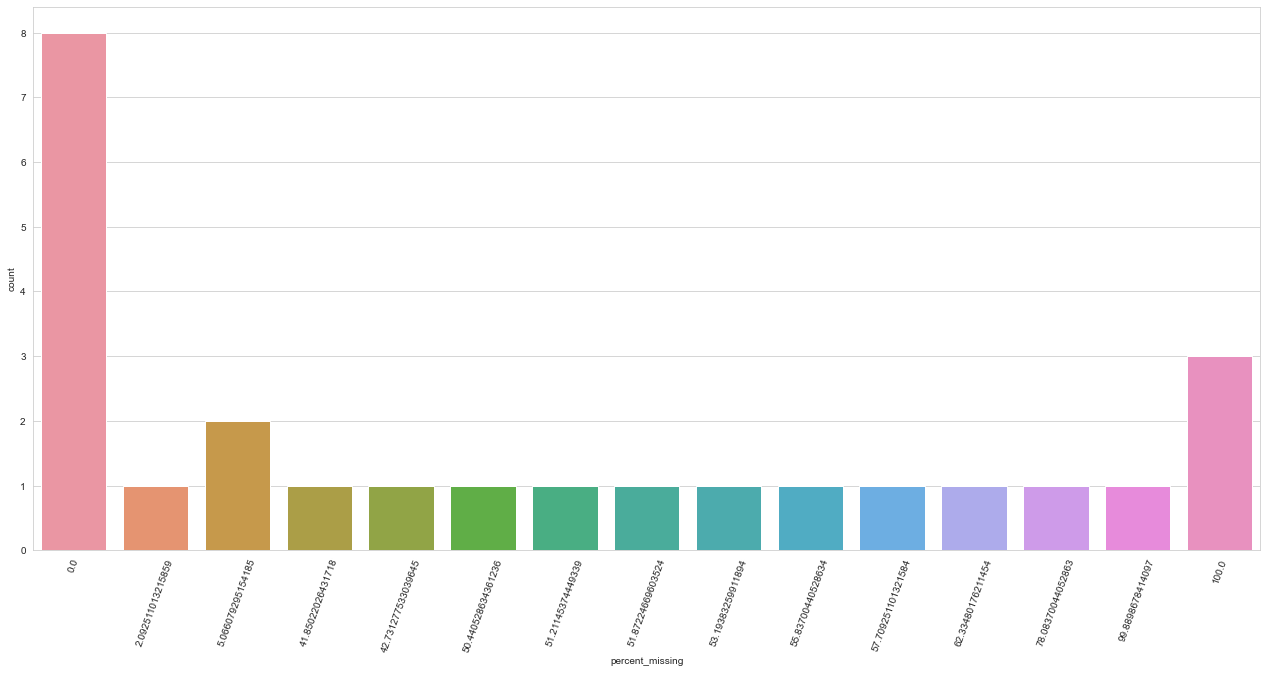

<IPython.core.display.Javascript object>

,column_name,percent_missing
country,country,0.000000
country_long,country_long,0.000000
name,name,0.000000
gppd_idnr,gppd_idnr,0.000000
capacity_mw,capacity_mw,0.000000
latitude,latitude,5.066079
longitude,longitude,5.066079
primary_fuel,primary_fuel,0.000000
other_fuel1,other_fuel1,78.083700
other_fuel2,other_fuel2,99.889868


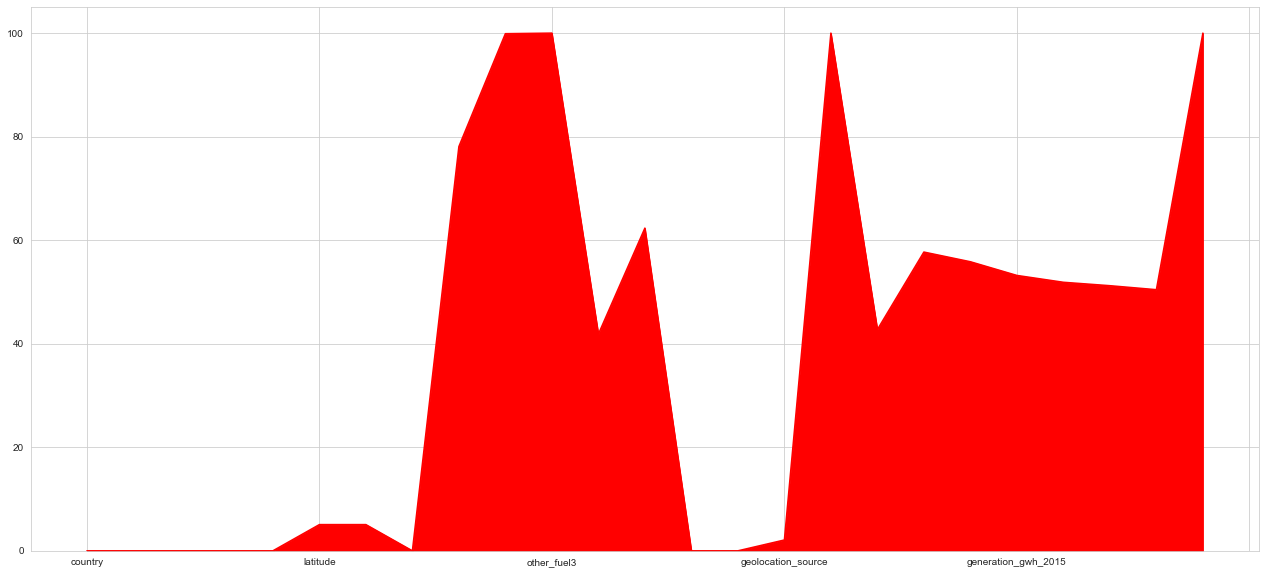

In [8]:
#checking the Null Values 
Nan_percentage(df)

In [9]:
#grrting the details of Catagorical data
for i in df.columns:
    if df[i].dtypes=='O':
        val=df[i].value_counts()
        print(val)
    else:
        pass

IND    908
Name: country, dtype: int64
India    908
Name: country_long, dtype: int64
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADAMPARI                  1
KADANA                     1
KADRA                      1
KAHALGAON                  1
iEnergy Theni Wind Farm    1
Name: name, Length: 908, dtype: int64
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000166    1
IND0000167    1
IND0000168    1
IND0000169    1
WRI1026761    1
Name: gppd_idnr, Length: 908, dtype: int64
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64
Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64
Oil    1
Name: other_fuel2, dtype: int64
Acc Acc ltd                                          

In [10]:
#From above result we can see that Our Country and Country long have only one value so we are going to drop that one 
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [11]:
#checking the Shape of our Data Set Aftyer Droped rthe columns
df.shape

(908, 23)

In [12]:
#LetsChake the NaN vcalues in this Data set 
df.isnull().sum().any()

True

<IPython.core.display.Javascript object>

<AxesSubplot:>

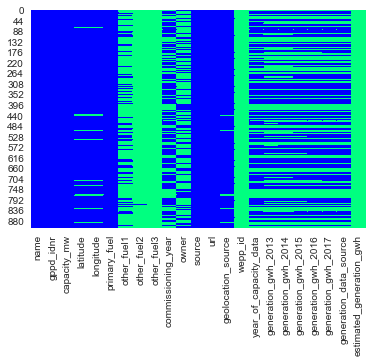

In [13]:
#From the Above Result we can get that there is some Nan Values Are Present so lets go to see that with sea born
sns.heatmap(df.isnull(),cbar=False,cmap='winter')

In [14]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [15]:
#we can see that there are 4 coloumns which have lot of NaN values so am going to drop this
nan_col=['other_fuel2', 'other_fuel3','wepp_id','estimated_generation_gwh']
df.drop(columns=nan_col,axis=1,inplace=True)

In [16]:
#Checking the Shape of Data Set
df.shape

(908, 19)

<IPython.core.display.Javascript object>

<AxesSubplot:>

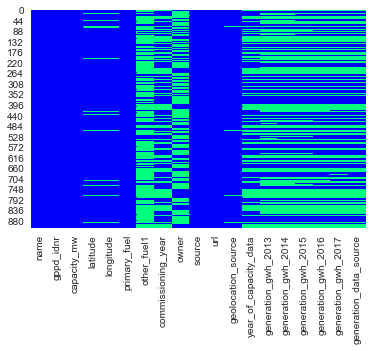

In [17]:
#Lets Visualize the Nan values with seaborn 
sns.heatmap(df.isnull(),cbar=False,cmap='winter')

In [18]:
#lets go for Handelling the Nan Values 
def Handel_Nan(df):
    cn=df.columns
    for i in cn:
        if df[i].dtype!='object':
            df[i].fillna(df[i].mean(),inplace=True)
        else:
            df[i].fillna(df[i].mode()[0],inplace=True)
Handel_Nan(df)

False


<IPython.core.display.Javascript object>

<AxesSubplot:>

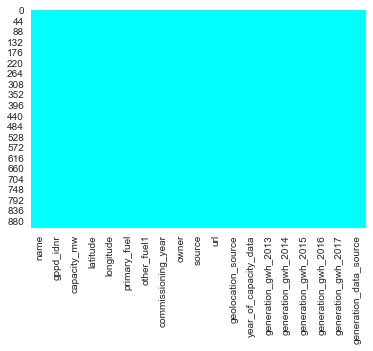

In [19]:
#Lets See is all nan values are treated or not 
print(df.isnull().sum().any())
sns.heatmap(df.isnull(),cbar=False,cmap='cool')

# Statictics

In [20]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,12.994825,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1996.876894,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2003.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

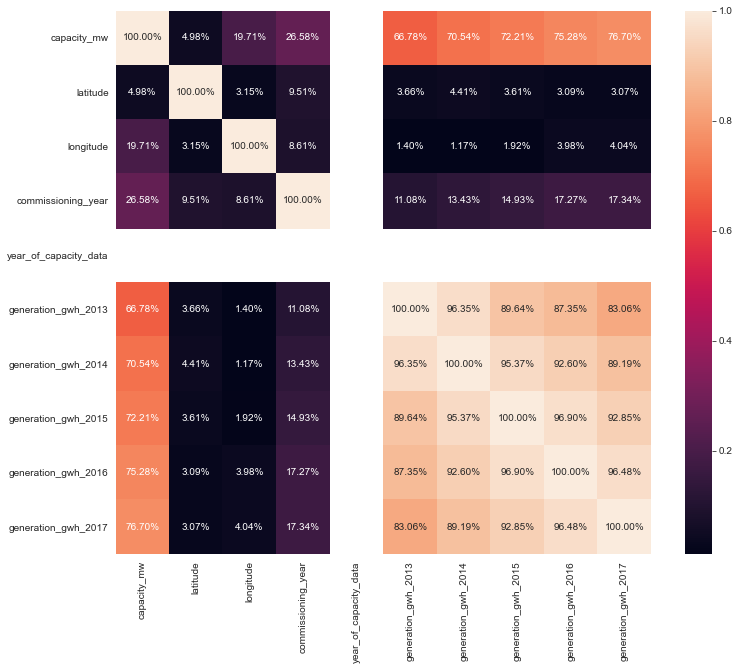

In [21]:
#checking the correlation with heatmap
plt.figure(figsize=[12,10]) 
sns.heatmap(df.corr(),annot=True,fmt='0.2%')

In [22]:
df.drop(columns=['name','gppd_idnr','url'],axis=1,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

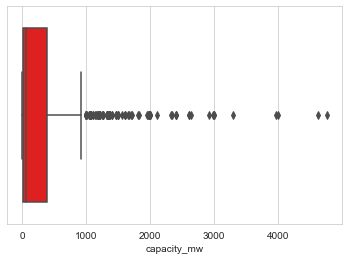

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

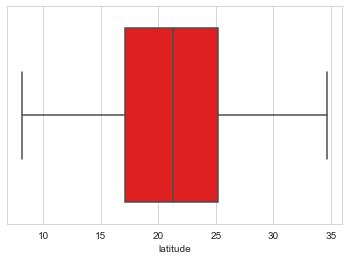

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

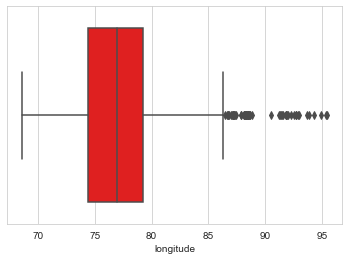

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

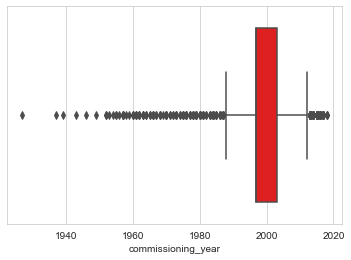

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

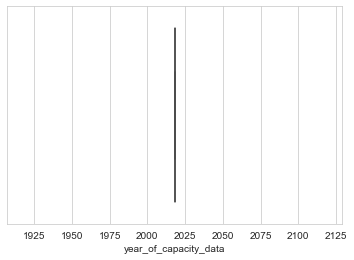

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

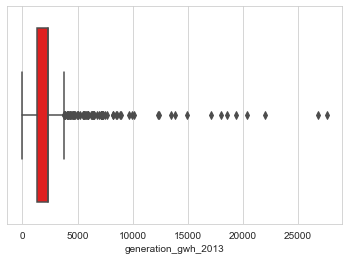

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

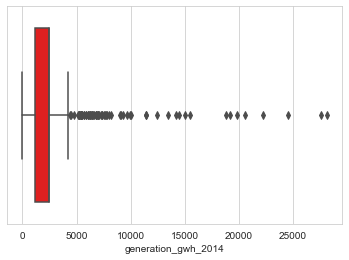

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

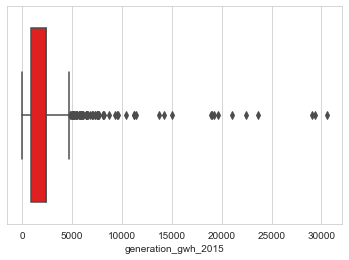

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

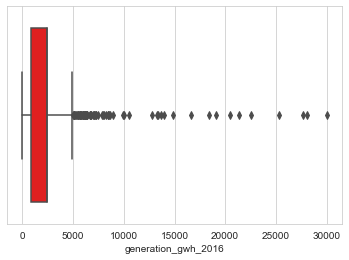

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

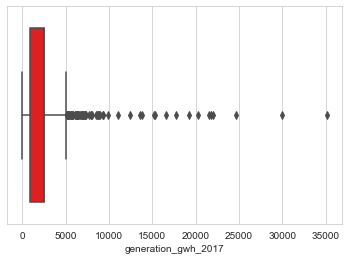

<IPython.core.display.Javascript object>

In [23]:
d=df.columns
for i in d:
    try:
        sns.boxplot(df[i],color='red')
        plt.show()
    except TypeError:
        pass

<IPython.core.display.Javascript object>

<AxesSubplot:>

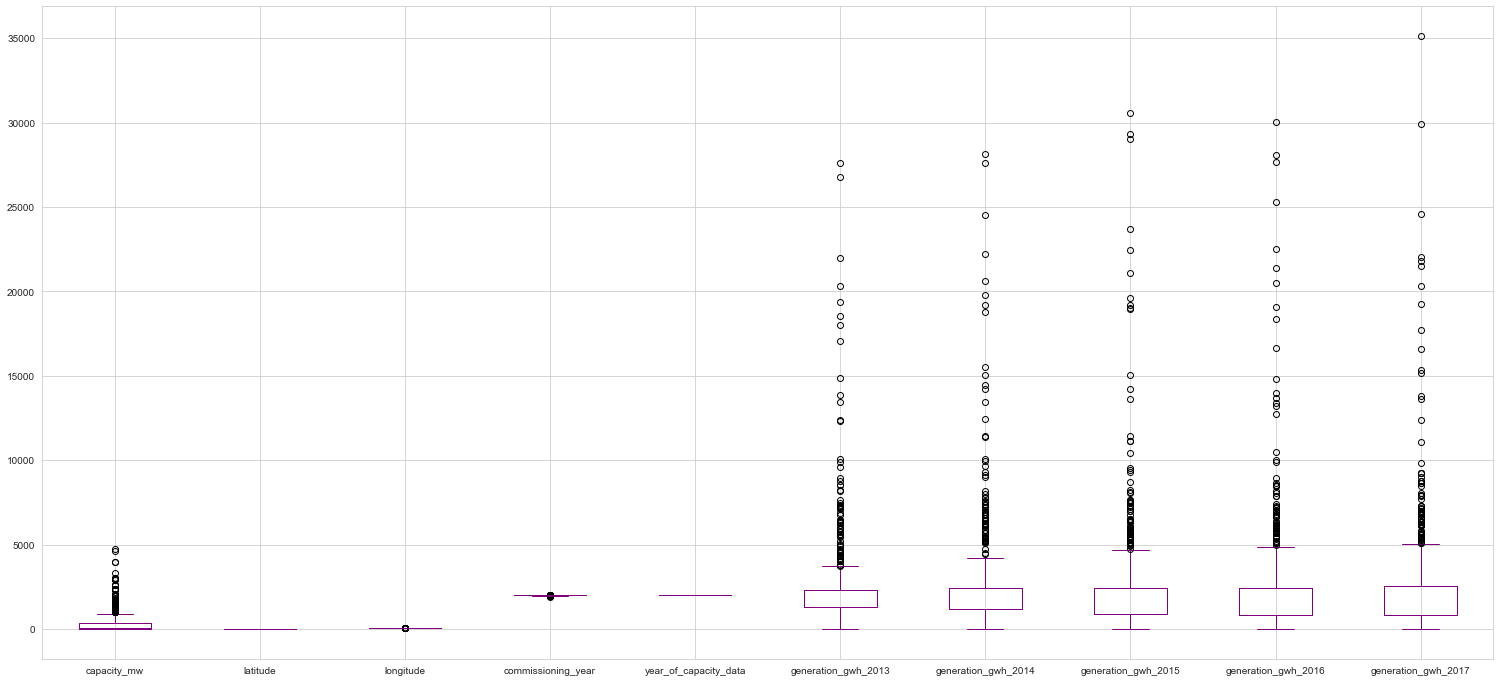

In [24]:
plt.figure(figsize=[26,12])
df.boxplot(color='purple')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

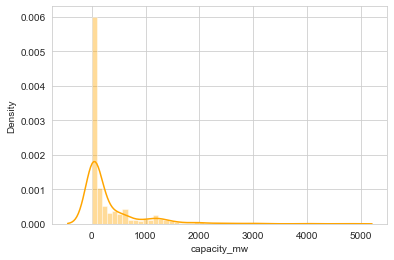

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

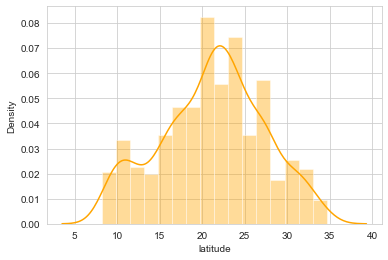

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

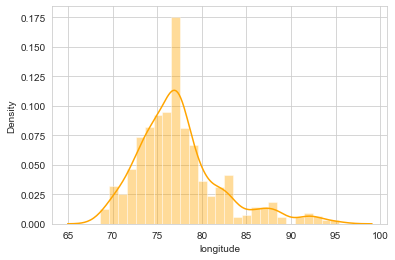

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

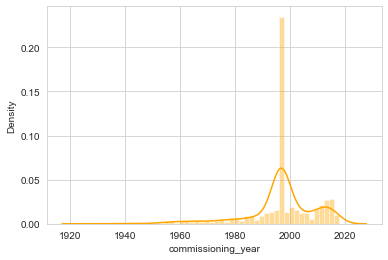

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

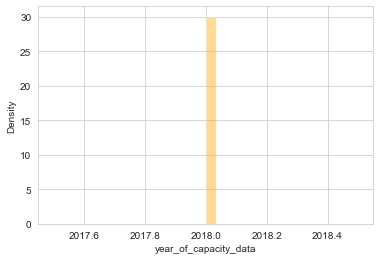

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

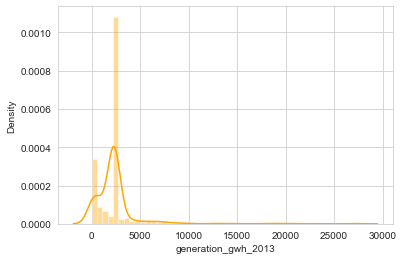

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

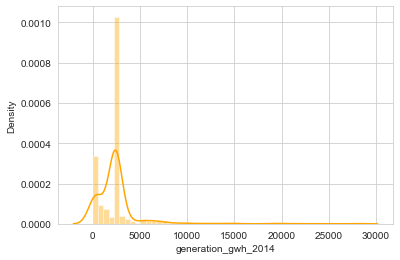

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

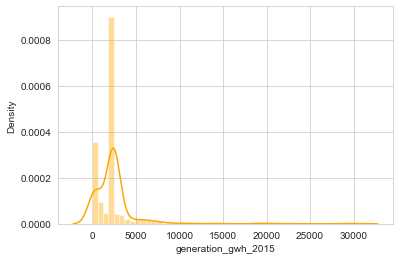

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

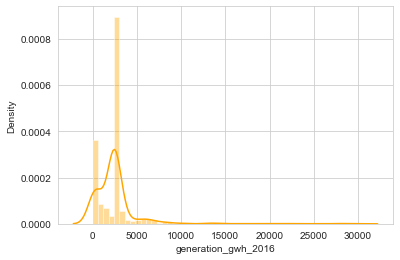

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

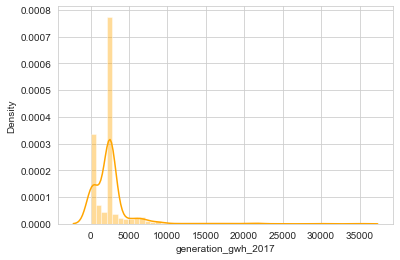

<IPython.core.display.Javascript object>

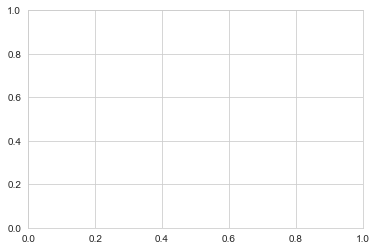

In [25]:
d=df.columns
sns.set_style=("whitegrid")
for i in d:
    try:
        sns.distplot(df[i],color='orange')
        plt.show()
    except ValueError:
        pass

In [26]:
cat_df = df.select_dtypes(include=['object']).copy() 

In [27]:
cat_df

,primary_fuel,other_fuel1,owner,source,geolocation_source,generation_data_source
0,Solar,Oil,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,Central Electricity Authority
1,Coal,Oil,Ultratech Cement ltd,Ultratech Cement ltd,WRI,Central Electricity Authority
2,Wind,Oil,AES,CDM,WRI,Central Electricity Authority
3,Gas,Oil,Acc Acc ltd,Central Electricity Authority,WRI,Central Electricity Authority
4,Coal,Oil,Acc Acc ltd,Central Electricity Authority,WRI,Central Electricity Authority
...,...,...,...,...,...,...
903,Coal,Oil,Acc Acc ltd,Central Electricity Authority,WRI,Central Electricity Authority
904,Solar,Oil,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,Central Electricity Authority
905,Wind,Oil,Acc Acc ltd,CDM,WRI,Central Electricity Authority
906,Coal,Oil,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,Central Electricity Authority


In [28]:
num_df = df.select_dtypes(include=['int','float']).copy() 

In [29]:
num_df

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2011.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2004.000000,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,2015.000000,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.000000,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [30]:
#Lets Visualize the data
#Numeric data
#Making A function
def numeric(col):
    try:
        sns.scatterplot(x=col,data=num_df)
        plt.shhow()
    except:
        try:
            sns.violinplot(x=col,data=num_df)
            plt.show()
        except:
            try:
                sns.countplot(x=col,data=num_df)
                plt.show()
            except:
                print("Unable to print")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

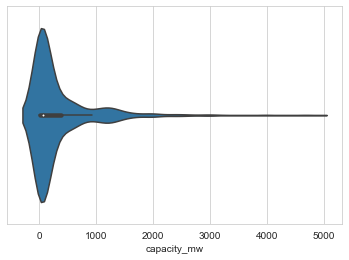

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

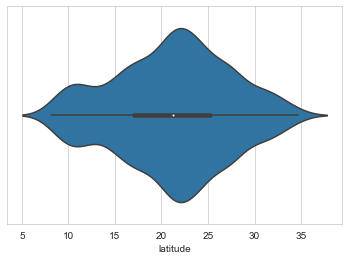

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

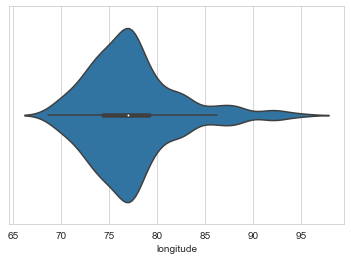

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

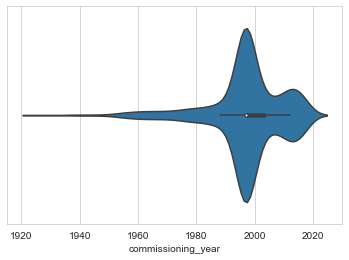

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

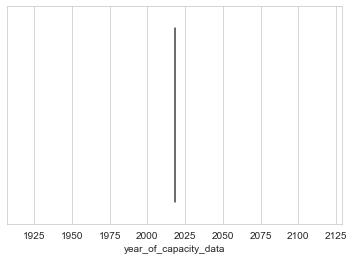

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

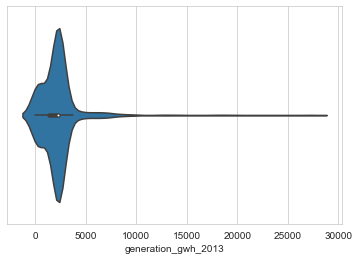

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

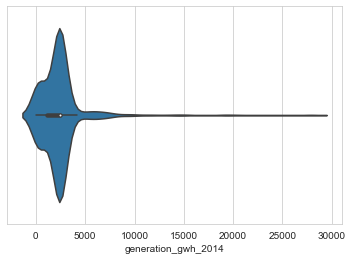

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

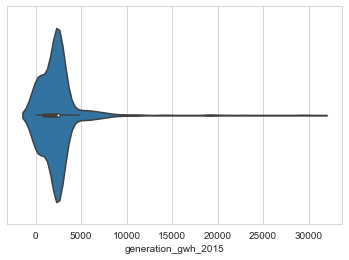

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

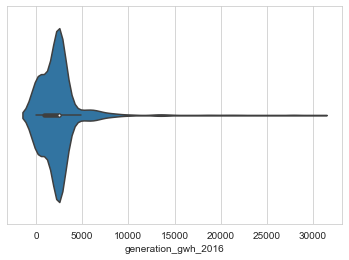

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

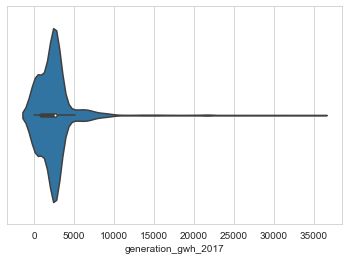

In [31]:
for i in num_df.columns:
    numeric(i)

In [32]:
#Lets plot the Catagorical Data
def catagorical(col):
    try:
        sns.barplot(x=col,data=cat_df)
        plt.shhow()
    except:
        try:
            sns.countplot(x=col,data=cat_df)
            plt.show()
        except:
            print("Unable to print")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

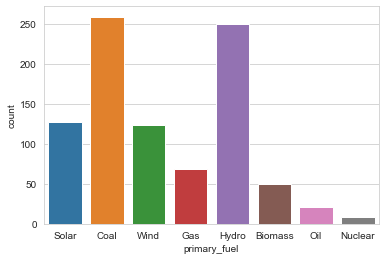

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

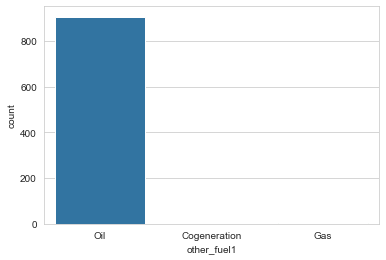

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

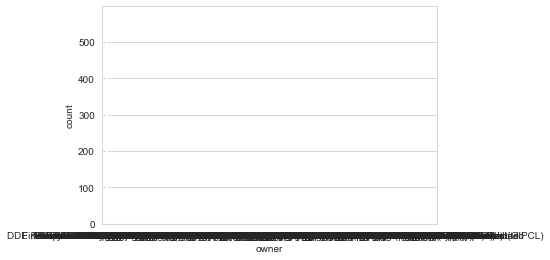

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

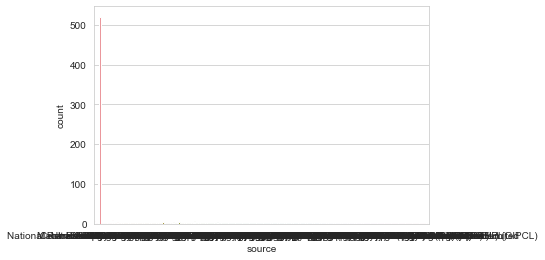

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

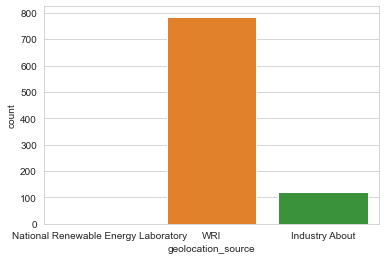

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

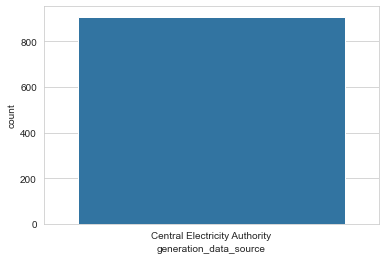

In [33]:
for i in cat_df.columns:
    catagorical(i)

In [34]:
df['primary_fuel'].value_counts(normalize=True)

Coal       0.285242
Hydro      0.275330
Solar      0.139868
Wind       0.135463
Gas        0.075991
Biomass    0.055066
Oil        0.023128
Nuclear    0.009912
Name: primary_fuel, dtype: float64

In [35]:
#Here We can say our data set is inbalaced data set 


# Bai Variant Analysis


In [36]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source'],
      dtype='object')

In [37]:
#removing the Outliers from Test dataset
#Making function to remove the outliers with IQR hypertuning

Q1=df.quantile(0.02)
Q3=df.quantile(0.98)
IQR=Q3-Q1
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
loss_=((len(df)-len(df_new))/len(df))*100
print(df_new.shape,df.shape)
print("Data Loss % is →→",loss_)

(904, 16) (908, 16)
Data Loss % is →→ 0.4405286343612335


In [38]:
df_new.shape

(904, 16)

In [39]:
df_new.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,98.0,24.7663,74.6090,Coal,Oil,1996.876894,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,39.2,21.9038,69.3732,Wind,Oil,1996.876894,AES,CDM,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


In [40]:
df_new.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

In [41]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
le=LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtypes=='O':
        df_new[i]=le.fit_transform(df_new[i])


In [42]:
x=df_new.drop('primary_fuel',axis=1)
y=df_new[["primary_fuel"]]

In [43]:
y.value_counts()

primary_fuel
1               255
3               250
6               127
7               123
2                69
0                50
5                21
4                 9
dtype: int64

In [44]:
for i in x.columns:
    if x[i].dtypes!='int' or 'float':
        x[i]=le.fit_transform(x[i])
x.dtypes

capacity_mw               int64
latitude                  int64
longitude                 int64
other_fuel1               int64
commissioning_year        int64
owner                     int64
source                    int64
geolocation_source        int64
year_of_capacity_data     int64
generation_gwh_2013       int64
generation_gwh_2014       int64
generation_gwh_2015       int64
generation_gwh_2016       int64
generation_gwh_2017       int64
generation_data_source    int64
dtype: object

In [45]:
#Data Balancing
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

primary_fuel
0               255
1               255
2               255
3               255
4               255
5               255
6               255
7               255
dtype: int64

In [46]:
#From above result we can see taht now our dataset is balanced 
#Note →we can do this also after sacling the data set 

In [47]:
#Now we are going tom check the shape of x and y
print(X_sm.shape,y_sm.shape)

(2040, 15) (2040, 1)


In [48]:
#Lests scalling our data set with min_max scaler 
#for better undersatnd 
#check the Below Link

https://medium.com/@ranjitmaity95/min-max-scaler-b2411ab3136d

In [49]:
x.dtypes

capacity_mw               int64
latitude                  int64
longitude                 int64
other_fuel1               int64
commissioning_year        int64
owner                     int64
source                    int64
geolocation_source        int64
year_of_capacity_data     int64
generation_gwh_2013       int64
generation_gwh_2014       int64
generation_gwh_2015       int64
generation_gwh_2016       int64
generation_gwh_2017       int64
generation_data_source    int64
dtype: object

Jupyter notebook→ https://github.com/RanjitM007/Modules_create_own/blob/main/Data_scalling/min_max%20Scaller.ipynb

In [51]:
mn=MinMaxScaler()
X_=mn.fit_transform(X_sm)
x=pd.DataFrame(X_,columns=X_sm.columns)

<IPython.core.display.Javascript object>

In [52]:
x.head()

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0.025000,0.872749,0.171117,1.0,0.904110,0.820789,0.573684,0.5,0.0,0.700000,0.683784,0.677665,0.673317,0.669951,0.0
1,0.500000,0.708283,0.281553,1.0,0.698630,0.924731,0.915789,1.0,0.0,0.700000,0.683784,0.677665,0.673317,0.669951,0.0
2,0.338889,0.505402,0.009709,1.0,0.698630,0.007168,0.110526,1.0,0.0,0.700000,0.683784,0.677665,0.673317,0.669951,0.0
3,0.566667,0.654262,0.975728,1.0,0.808219,0.017921,0.115789,1.0,0.0,0.438889,0.424324,0.502538,0.496259,0.438424,0.0
4,0.958333,0.509004,0.851942,1.0,0.958904,0.017921,0.115789,1.0,0.0,0.633333,0.743243,0.890863,0.902743,0.839901,0.0


In [53]:
#Lets Do The Pca
from sklearn.decomposition import PCA
cover_matrix=PCA(n_components=len(x.columns))
cover_matrix.fit(x)

PCA(n_components=15)

In [54]:
def plot_cov_corr(data):
    # calculate the covariance matrix
    cov = np.cov(data, rowvar=False)
    # calculate the eigenvalues and eigenvectors
    eig_val, eig_vec = np.linalg.eig(cov)
    # sort the eigenvalues in descending order
    idx = eig_val.argsort()[::-1]
    eig_val = eig_val[idx]
    eig_vec = eig_vec[:,idx]
    # calculate the sum of eigenvalues
    total = sum(eig_val)
    # calculate the percentage of eigenvalues
    percentage = [(i/total)*100 for i in sorted(eig_val, reverse=True)]
    # plot the cumulative percentage of eigenvalues
    plt.plot(percentage)
    plt.show()
    # calculate the cumulative percentage of eigenvalues
    cumulative_percentage = np.cumsum(percentage)
    # find the n_component
    n_component = 0
    for i in range(len(cumulative_percentage)):
        if cumulative_percentage[i] > 95:
            n_component = i + 1
            break
    # calculate the eigenvectors of the n_component
    eig_vec_n = eig_vec[:,:n_component]
    # calculate the new data
    data_new = np.matmul(data, eig_vec_n)
    # calculate the correlation matrix
    corr_mat = np.corrcoef(data_new, rowvar=False)
    # plot the correlation matrix
    plt.imshow(corr_mat, cmap='jet')
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

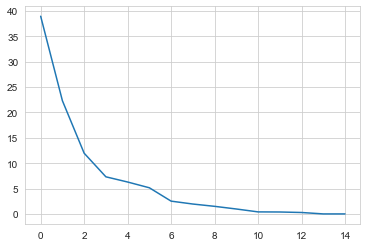

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

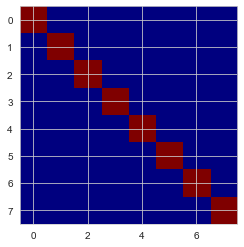

In [55]:
plot_cov_corr(x)

In [56]:
def find_n_component_cov_corr(data):
    # calculate the covariance matrix
    cov = np.cov(data, rowvar=False)
    # calculate the eigenvalues and eigenvectors
    eig_val, eig_vec = np.linalg.eig(cov)
    # sort the eigenvalues in descending order
    idx = eig_val.argsort()[::-1]
    eig_val = eig_val[idx]
    eig_vec = eig_vec[:,idx]
    # calculate the sum of eigenvalues
    total = sum(eig_val)
    # calculate the percentage of eigenvalues
    percentage = [(i/total)*100 for i in sorted(eig_val, reverse=True)]
    # plot the cumulative percentage of eigenvalues
    plt.plot(percentage)
    plt.show()
    # calculate the cumulative percentage of eigenvalues
    cumulative_percentage = np.cumsum(percentage)
    # find the n_component
    n_component = 0
    for i in range(len(cumulative_percentage)):
        if cumulative_percentage[i] > 95:
            n_component = i + 1
            break
    # calculate the eigenvectors of the n_component
    eig_vec_n = eig_vec[:,:n_component]
    # calculate the new data
    data_new = np.matmul(data, eig_vec_n)
    # calculate the correlation matrix
    corr_mat = np.corrcoef(data_new, rowvar=False)
    # plot the correlation matrix
    plt.imshow(corr_mat, cmap='jet')
    plt.show()
    
    return n_component

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

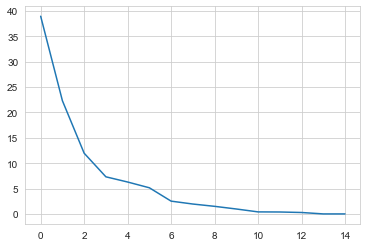

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

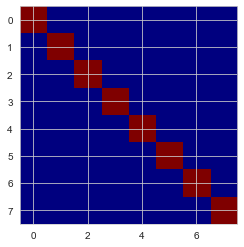

8

In [57]:
find_n_component_cov_corr(x)

In [58]:
pca=PCA(n_components=8)
x1=pca.fit_transform(x)
x=pd.DataFrame(x1)

<IPython.core.display.Javascript object>

In [59]:
x.head()

,0,1,2,3,4,5,6,7
0,-0.711903,-0.629939,0.202158,-0.075371,-0.326518,0.000297,0.126926,-0.205986
1,-0.591593,-0.318882,-0.257178,-0.077116,-0.631463,-0.390905,0.000525,0.093147
2,-0.145262,0.188547,0.098711,-0.455078,0.075918,0.228504,0.070462,-0.014330
3,0.462560,0.186446,0.177039,0.418635,-0.215489,0.059647,0.075208,-0.061751
4,-0.123540,0.784530,0.137356,0.358139,-0.070225,-0.205286,0.227187,-0.084810


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_score(data):
    # calculate the variance inflation factor
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif["features"] = data.columns
    return vif

In [61]:
get_vif_score(x)

<IPython.core.display.Javascript object>

,VIF Factor,features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7


In [62]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [63]:
y=y_sm

In [64]:
x.shape

(2040, 8)

In [65]:
y.shape

(2040, 1)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report

In [98]:
#In this data set we know that out target variable Label is catagorical so we are going to take Logistic regresson
#lets make a function for getting the best random_satae for a model toget better accuracy score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_curve,auc
from sklearn.model_selection import train_test_split
final_random_state=[]#results will be append 
Highest_acc=[]#results will be append
clf_f=[]
def max_acc(clf,x,y):
    max_acc=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_prd=clf.predict(x_test)
        rc=f1_score(y_test,y_prd,average='macro')
        if rc>max_acc:
            max_acc=rc
            final_r=r
    final_random_state.append(final_r)
    clf_f.append(clf)
    Highest_acc.append(max_acc*100)
    print("max accuracy_ score coressponding to ♣♣→",final_r,"is♣♣",max_acc)


In [82]:
from sklearn.model_selection import learning_curve
def lnc(model,g):#model=Regressor / classifier aalgorithms ,g= Best Random State no
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=g,test_size=0.20)
    lc=learning_curve(model,x_train,y_train,cv=10)
    size=lc[0]
    train_score=[lc[1][i].mean() for i in range (0,5)]
    test_score=[lc[2][i].mean() for i in range (0,5)]
    fig=plt.figure(figsize=(12,8))
    plt.plot(size,train_score,color="red")
    plt.plot(size,test_score,color="green")

In [69]:
lg= LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
max_acc(lg,x,y)

max accuracy_ score coressponding to ♣♣→ 92 is♣♣ 0.6841193679215206


In [70]:
Bais=[]
var=[]
def bais_var(clf,x,y,z):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=z,test_size=0.20,stratify=y)
    clf.fit(x_train,y_train)
    trn_scr=clf.score(x_train,y_train)
    bais=1-trn_scr
    Bais.append(bais)
    test=clf.score(x_test,y_test)
    variance=1-test
    var.append(variance)
    print("Bais →",bais,"\n","Variance →",variance)

In [71]:
bais_var(lg,x,y,96)

Bais → 0.3584558823529411 
 Variance → 0.3431372549019608


In [ ]:
Bais

In [72]:
def PLT(md,x,y,rd):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20)
    md.fit(x_train,y_train)
    pre=md.predict(x_test)
    acc=f1_score(y_test,pre,average='macro')
    print(acc*100)
    cm=confusion_matrix(y_test,pre)
    print()
    print()
    sns.heatmap(cm,annot=True)
    plt.show()
    cr=classification_report(y_test,pre)
    print()
    print()
    print()
    print(cr,"\n","☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼")

62.84924112712087




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

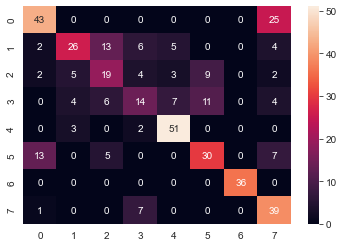




              precision    recall  f1-score   support

           0       0.70      0.63      0.67        68
           1       0.68      0.46      0.55        56
           2       0.44      0.43      0.44        44
           3       0.42      0.30      0.35        46
           4       0.77      0.91      0.84        56
           5       0.60      0.55      0.57        55
           6       1.00      1.00      1.00        36
           7       0.48      0.83      0.61        47

    accuracy                           0.63       408
   macro avg       0.64      0.64      0.63       408
weighted avg       0.64      0.63      0.62       408
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [73]:
PLT(lg,x,y,96)

In [74]:
#cross validataion 
from sklearn.model_selection import cross_val_score   
cvs=[]
def cross(model,x,y):
    c=cross_val_score(model,x,y,cv=5,scoring="f1")
    print("mean accuracy score for ",model,c.mean())
    print("Standard deviation  in accuracy score for ",model,c.std())
    print(c.mean())
    print("******************************************************")
    cvs.append(c.mean())
    print("After seen the cross validation score of",model,"the accuracy score mean is",c.mean())

In [75]:
cross(lg,x,y)

mean accuracy score for  LogisticRegression(multi_class='multinomial', random_state=0) nan
Standard deviation  in accuracy score for  LogisticRegression(multi_class='multinomial', random_state=0) nan
nan
******************************************************
After seen the cross validation score of LogisticRegression(multi_class='multinomial', random_state=0) the accuracy score mean is nan


In [76]:
#lets go with support vector classifier
from sklearn.svm import SVC
from sklearn.model_selection import *
svc=SVC()
parameters={"kernel":["poly","rbf","linear"],"C":[0.0001,0.001,0.01,0.1,1]}
Gs=GridSearchCV(svc,parameters,cv=5,scoring="f1")
Gs.fit(x,y)
Gs.best_params_#finding the best parameters with Gridsearchcv

{'C': 0.0001, 'kernel': 'poly'}

In [77]:
svc=SVC(C=0.0001,kernel='poly')
max_acc(svc,x,y)

max accuracy_ score coressponding to ♣♣→ 47 is♣♣ 0.344062746859234


2.383592017738359




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

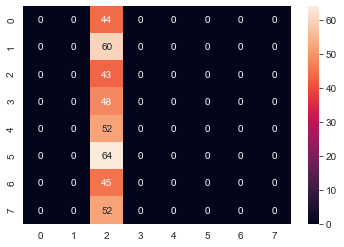




              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.00      0.00      0.00        60
           2       0.11      1.00      0.19        43
           3       0.00      0.00      0.00        48
           4       0.00      0.00      0.00        52
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        45
           7       0.00      0.00      0.00        52

    accuracy                           0.11       408
   macro avg       0.01      0.12      0.02       408
weighted avg       0.01      0.11      0.02       408
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [79]:
PLT(svc,x,y,47)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

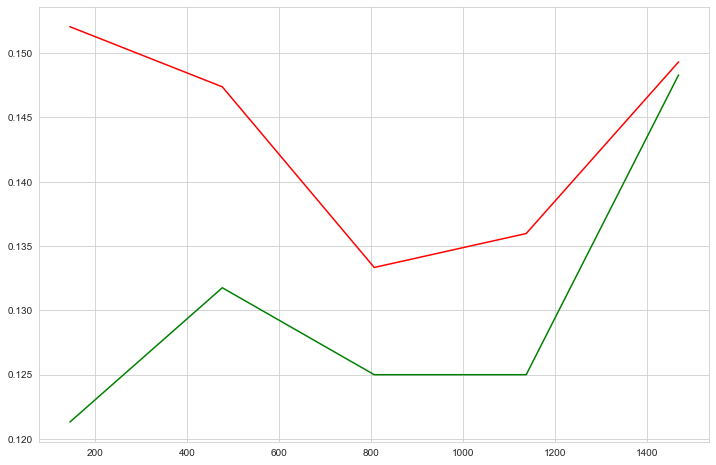

In [83]:
lnc(svc,47)

In [84]:
cross(svc,x,y)

mean accuracy score for  SVC(C=0.0001, kernel='poly') nan
Standard deviation  in accuracy score for  SVC(C=0.0001, kernel='poly') nan
nan
******************************************************
After seen the cross validation score of SVC(C=0.0001, kernel='poly') the accuracy score mean is nan


In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
parameters={"n_estimators":range(1,1000,250),"min_samples_leaf":range(1,10,2),"criterion":['gini','entropy']}
grfc=GridSearchCV(rfc,parameters,cv=11,scoring='f1')
grfc.fit(x,y)
grfc.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 1}

# Random Forest Classifier Parameters ↨

In [88]:
rffc=RandomForestClassifier(criterion='gini',min_samples_leaf=1,n_estimators=1)
max_acc(rffc,x,y)

max accuracy_ score coressponding to ♣♣→ 54 is♣♣ 0.8553865992681782


In [89]:
cross(rffc,x,y)

mean accuracy score for  RandomForestClassifier(n_estimators=1) nan
Standard deviation  in accuracy score for  RandomForestClassifier(n_estimators=1) nan
nan
******************************************************
After seen the cross validation score of RandomForestClassifier(n_estimators=1) the accuracy score mean is nan


In [92]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,45),'n_jobs':range(1,10,2)}
gkn=GridSearchCV(kn,parameters,scoring='f1',cv=10)
gkn.fit(x,y)
gkn.best_params_

{'n_jobs': 1, 'n_neighbors': 1}

In [99]:
knn_n=KNeighborsClassifier(n_jobs=1,n_neighbors=1)
max_acc(knn_n,x,y)

max accuracy_ score coressponding to ♣♣→ 97 is♣♣ 0.9270662932145853


In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=97)

In [111]:
from sklearn.model_selection import cross_val_score
k=20
kfold=KFold(n_splits=k,random_state=97,shuffle=True)
k_results=cross_val_score(knn_n,x,y,cv=kfold)
accuracy=np.mean(abs(k_results))
accuracy

<IPython.core.display.Javascript object>

0.9205882352941176

In [112]:
bais_var(knn_n,x,y,97)

Bais → 0.0 
 Variance → 0.07107843137254899


In [122]:
for i in range(1,15,2):
    kn=KNeighborsClassifier(n_neighbors=i)
    print(i)
    max_acc(kn,x,y)
    print("♠")

1
max accuracy_ score coressponding to ♣♣→ 97 is♣♣ 0.9270662932145853
♠
3
max accuracy_ score coressponding to ♣♣→ 78 is♣♣ 0.9074315967405134
♠
5
max accuracy_ score coressponding to ♣♣→ 78 is♣♣ 0.8920052848729652
♠
7
max accuracy_ score coressponding to ♣♣→ 54 is♣♣ 0.8709726025446881
♠
9
max accuracy_ score coressponding to ♣♣→ 92 is♣♣ 0.8588655377072807
♠
11
max accuracy_ score coressponding to ♣♣→ 78 is♣♣ 0.8512144645556929
♠
13
max accuracy_ score coressponding to ♣♣→ 96 is♣♣ 0.836669711327792
♠


In [123]:
for i in range(1,15,2):
    kn=KNeighborsClassifier(n_neighbors=5,n_jobs=i)
    print(i)
    max_acc(kn,x,y)
    print("♠")

1
max accuracy_ score coressponding to ♣♣→ 78 is♣♣ 0.8920052848729652
♠
3
max accuracy_ score coressponding to ♣♣→ 78 is♣♣ 0.8920052848729652
♠
5
max accuracy_ score coressponding to ♣♣→ 78 is♣♣ 0.8920052848729652
♠
7
max accuracy_ score coressponding to ♣♣→ 78 is♣♣ 0.8920052848729652
♠
9
max accuracy_ score coressponding to ♣♣→ 78 is♣♣ 0.8920052848729652
♠
11
max accuracy_ score coressponding to ♣♣→ 78 is♣♣ 0.8920052848729652
♠
13
max accuracy_ score coressponding to ♣♣→ 78 is♣♣ 0.8920052848729652
♠


In [124]:
#Model Finanlize
knn_Final=KNeighborsClassifier(n_neighbors=5)
#we are going to finalize our model Knn wih the Random state of 78
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=0.20,stratify=y)
knn_Final.fit(x_train,y_train)
predict=knn_Final.predict(x_test)
accuracy=f1_score(predict,y_test,average='micro')
print(accuracy)

0.8946078431372549


In [125]:
from sklearn.model_selection import cross_val_score
k=20
kfold=KFold(n_splits=k,random_state=78,shuffle=True)
k_results=cross_val_score(knn_Final,x,y,cv=kfold)
accuracy=np.mean(abs(k_results))
accuracy

<IPython.core.display.Javascript object>

0.8759803921568627

In [126]:
#confusion matix
cm=confusion_matrix(y_test,predict)

In [127]:
cm

array([[51,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 34,  8,  6,  0,  0,  0,  1],
       [ 0,  2, 45,  0,  0,  4,  0,  0],
       [ 0,  6,  3, 37,  0,  2,  0,  3],
       [ 0,  0,  0,  1, 50,  0,  0,  0],
       [ 1,  1,  0,  0,  0, 48,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 50,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 50]], dtype=int64)

In [131]:
cr=classification_report(y_test,predict)

In [132]:
cr

'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97        51\n           1       0.79      0.67      0.72        51\n           2       0.80      0.88      0.84        51\n           3       0.82      0.73      0.77        51\n           4       1.00      0.98      0.99        51\n           5       0.87      0.94      0.91        51\n           6       1.00      0.98      0.99        51\n           7       0.91      0.98      0.94        51\n\n    accuracy                           0.89       408\n   macro avg       0.89      0.89      0.89       408\nweighted avg       0.89      0.89      0.89       408\n'

In [134]:
import joblib
joblib.dump(knn_Final,"Global_power_classify.pkl")

['Global_power_classify.pkl']

In [136]:
joblib.dump(knn_Final,"Global_power_classify.csv")

['Global_power_classify.csv']

In [137]:
#Chekig the test data
model=joblib.load('Global_power_classify.pkl')

In [138]:
model.predict(x_test)

array([5, 4, 0, 2, 7, 7, 4, 0, 1, 2, 7, 6, 3, 4, 2, 0, 4, 3, 5, 2, 4, 2,
       4, 6, 7, 0, 0, 6, 6, 5, 2, 7, 4, 1, 5, 2, 7, 6, 2, 0, 0, 1, 2, 3,
       6, 0, 6, 3, 3, 2, 7, 0, 0, 6, 5, 3, 2, 4, 2, 4, 7, 5, 6, 7, 3, 0,
       7, 7, 1, 1, 6, 2, 7, 5, 7, 1, 5, 4, 3, 5, 6, 0, 5, 2, 1, 2, 3, 7,
       5, 1, 5, 4, 6, 6, 5, 6, 5, 6, 4, 4, 5, 5, 6, 2, 7, 6, 7, 5, 1, 3,
       6, 1, 4, 5, 1, 1, 3, 1, 3, 5, 1, 1, 4, 1, 1, 0, 1, 3, 7, 5, 7, 0,
       2, 7, 6, 5, 7, 3, 4, 5, 4, 5, 5, 0, 0, 5, 4, 7, 4, 3, 7, 4, 7, 2,
       6, 7, 5, 1, 6, 1, 0, 4, 2, 1, 7, 0, 3, 3, 1, 0, 5, 1, 6, 5, 7, 1,
       0, 1, 6, 5, 5, 5, 0, 5, 1, 2, 7, 7, 5, 6, 5, 6, 7, 5, 1, 1, 2, 4,
       0, 6, 7, 1, 0, 2, 1, 3, 2, 3, 6, 0, 3, 2, 0, 7, 5, 5, 4, 4, 7, 0,
       0, 6, 0, 2, 4, 4, 7, 4, 7, 7, 6, 4, 3, 4, 2, 0, 5, 0, 4, 2, 7, 0,
       4, 0, 3, 6, 6, 1, 5, 6, 2, 3, 2, 2, 7, 2, 3, 6, 0, 6, 0, 2, 2, 7,
       3, 1, 6, 1, 4, 4, 6, 5, 6, 1, 3, 5, 0, 3, 0, 5, 4, 4, 7, 7, 1, 3,
       4, 3, 7, 0, 2, 0, 7, 2, 4, 6, 3, 5, 4, 2, 5,